In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt

load_dotenv()

True

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")


In [3]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["SPY", "AAPL", "TSLA", "GE", "F", "MSFT","NIO", "PFE", "AMZN","AAL","DIS","PLUG"]


timeframe = "1D"

In [4]:
def get_data(ticker):
    df = alpaca.get_barset(
        ticker,
        timeframe,
        start = current_date
    ).df

    return df


In [5]:
def get_columns(dataframe):
    dataframe = dataframe.T.reset_index(drop = True).T
    dataframe = dataframe.rename(columns={3:"close"})
    dataframe = dataframe.loc[:,["close"]]

    return dataframe

In [6]:
def calc_data(dataframe):
    dataframe["pct_change"] = dataframe["close"].pct_change()
    dataframe["volatility"] = np.std(dataframe["pct_change"])

    return dataframe


In [7]:
df_spy = get_data("SPY")
df_spy = get_columns(df_spy)
df_spy = calc_data(df_spy)
df_spy.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,323.67,NaN,0.021387
2020-01-07 00:00:00-05:00,322.76,-0.002812,0.021387
2020-01-08 00:00:00-05:00,324.42,0.005143,0.021387
2020-01-09 00:00:00-05:00,326.62,0.006781,0.021387
2020-01-10 00:00:00-05:00,325.70,-0.002817,0.021387


<AxesSubplot:xlabel='time'>

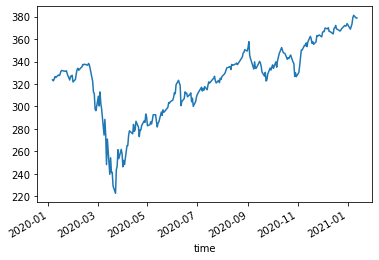

In [8]:
df_spy.close.plot()

In [9]:
df_aapl = get_data("AAPL")
df_aapl = get_columns(df_aapl)
df_aapl = calc_data(df_aapl)
df_aapl.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,299.78,NaN,0.05484
2020-01-07 00:00:00-05:00,298.27,-0.005037,0.05484
2020-01-08 00:00:00-05:00,303.15,0.016361,0.05484
2020-01-09 00:00:00-05:00,309.71,0.021639,0.05484
2020-01-10 00:00:00-05:00,310.37,0.002131,0.05484


In [10]:
df_aapl_1 = df_aapl.loc[:"20200828"]
df_aapl_1["close"] = (df_aapl_1["close"]/2)
df_aapl_1.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,149.890,NaN,0.05484
2020-01-07 00:00:00-05:00,149.135,-0.005037,0.05484
2020-01-08 00:00:00-05:00,151.575,0.016361,0.05484
2020-01-09 00:00:00-05:00,154.855,0.021639,0.05484
2020-01-10 00:00:00-05:00,155.185,0.002131,0.05484


In [11]:
df_apple_2 = df_aapl.loc["20200829":]
df_apple_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,128.85,-0.741696,0.05484
2020-09-01 00:00:00-04:00,134.20,0.041521,0.05484
2020-09-02 00:00:00-04:00,131.22,-0.022206,0.05484
2020-09-03 00:00:00-04:00,120.92,-0.078494,0.05484
2020-09-04 00:00:00-04:00,120.90,-0.000165,0.05484


In [12]:
df_aapl = pd.concat([df_aapl_1, df_apple_2])
df_aapl

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,149.8900,NaN,0.05484
2020-01-07 00:00:00-05:00,149.1350,-0.005037,0.05484
2020-01-08 00:00:00-05:00,151.5750,0.016361,0.05484
2020-01-09 00:00:00-05:00,154.8550,0.021639,0.05484
2020-01-10 00:00:00-05:00,155.1850,0.002131,0.05484
...,...,...,...
2021-01-06 00:00:00-05:00,126.5800,-0.033372,0.05484
2021-01-07 00:00:00-05:00,130.8500,0.033734,0.05484
2021-01-08 00:00:00-05:00,131.9900,0.008712,0.05484


In [13]:
df_tsla = get_data("TSLA")
df_tsla = get_columns(df_tsla)
df_tsla = calc_data(df_tsla)
df_tsla.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,451.4001,NaN,0.074088
2020-01-07 00:00:00-05:00,469.1700,0.039366,0.074088
2020-01-08 00:00:00-05:00,492.0900,0.048852,0.074088
2020-01-09 00:00:00-05:00,481.4900,-0.021541,0.074088
2020-01-10 00:00:00-05:00,477.9600,-0.007331,0.074088


In [14]:
df_tsla_1 = df_tsla.loc[:"20200828"]
df_tsla_1["close"] = (df_tsla_1["close"]/5)
df_tsla_1.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,90.28002,NaN,0.074088
2020-01-07 00:00:00-05:00,93.83400,0.039366,0.074088
2020-01-08 00:00:00-05:00,98.41800,0.048852,0.074088
2020-01-09 00:00:00-05:00,96.29800,-0.021541,0.074088
2020-01-10 00:00:00-05:00,95.59200,-0.007331,0.074088


In [15]:
df_tsla_2 = df_tsla.loc["20200829":]
df_tsla_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,498.5100,-0.774789,0.074088
2020-09-01 00:00:00-04:00,475.0400,-0.047080,0.074088
2020-09-02 00:00:00-04:00,447.2450,-0.058511,0.074088
2020-09-03 00:00:00-04:00,407.0000,-0.089984,0.074088
2020-09-04 00:00:00-04:00,417.9307,0.026857,0.074088


In [16]:
df_tsla = pd.concat([df_tsla_1, df_tsla_2])
df_tsla

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,90.28002,NaN,0.074088
2020-01-07 00:00:00-05:00,93.83400,0.039366,0.074088
2020-01-08 00:00:00-05:00,98.41800,0.048852,0.074088
2020-01-09 00:00:00-05:00,96.29800,-0.021541,0.074088
2020-01-10 00:00:00-05:00,95.59200,-0.007331,0.074088
...,...,...,...
2021-01-06 00:00:00-05:00,756.46000,0.029120,0.074088
2021-01-07 00:00:00-05:00,816.24000,0.079026,0.074088
2021-01-08 00:00:00-05:00,880.03000,0.078151,0.074088


In [17]:
df_fit = get_data("FIT")
df_fit = get_columns(df_fit)
df_fit = calc_data(df_fit)
df_fit.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,6.500,NaN,0.013303
2020-01-07 00:00:00-05:00,6.550,0.007692,0.013303
2020-01-08 00:00:00-05:00,6.605,0.008397,0.013303
2020-01-09 00:00:00-05:00,6.640,0.005299,0.013303
2020-01-10 00:00:00-05:00,6.570,-0.010542,0.013303


In [18]:
df_fb = get_data("FB")
df_fb = get_columns(df_fb)
df_fb = calc_data(df_fb)
df_fb.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,212.5855,NaN,0.029024
2020-01-07 00:00:00-05:00,213.0500,0.002185,0.029024
2020-01-08 00:00:00-05:00,215.3000,0.010561,0.029024
2020-01-09 00:00:00-05:00,218.3100,0.013980,0.029024
2020-01-10 00:00:00-05:00,218.0700,-0.001099,0.029024


In [19]:
df_googl = get_data("GOOGL")
df_googl = get_columns(df_googl)
df_googl = calc_data(df_googl)
df_googl.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,1397.43,NaN,0.024225
2020-01-07 00:00:00-05:00,1395.55,-0.001345,0.024225
2020-01-08 00:00:00-05:00,1405.48,0.007115,0.024225
2020-01-09 00:00:00-05:00,1420.15,0.010438,0.024225
2020-01-10 00:00:00-05:00,1429.37,0.006492,0.024225


In [20]:
df_ge = get_data("GE")
df_ge = get_columns(df_ge)
df_ge = calc_data(df_ge)
df_ge.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,12.140,NaN,0.039349
2020-01-07 00:00:00-05:00,12.055,-0.007002,0.039349
2020-01-08 00:00:00-05:00,11.930,-0.010369,0.039349
2020-01-09 00:00:00-05:00,11.900,-0.002515,0.039349
2020-01-10 00:00:00-05:00,11.670,-0.019328,0.039349


In [21]:
df_nio = get_data("NIO")
df_nio = get_columns(df_nio)
df_nio = calc_data(df_nio)
df_nio.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,3.690,NaN,0.064351
2020-01-07 00:00:00-05:00,3.250,-0.119241,0.064351
2020-01-08 00:00:00-05:00,3.385,0.041538,0.064351
2020-01-09 00:00:00-05:00,3.470,0.025111,0.064351
2020-01-10 00:00:00-05:00,3.510,0.011527,0.064351


In [22]:
df_f = get_data("F")
df_f = get_columns(df_f)
df_f = calc_data(df_f)
df_f.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,9.150,NaN,0.035259
2020-01-07 00:00:00-05:00,9.250,0.010929,0.035259
2020-01-08 00:00:00-05:00,9.250,0.000000,0.035259
2020-01-09 00:00:00-05:00,9.275,0.002703,0.035259
2020-01-10 00:00:00-05:00,9.250,-0.002695,0.035259


In [23]:
df_msft = get_data("MSFT")
df_msft = get_columns(df_msft)
df_msft = calc_data(df_msft)
df_msft.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,159.02,NaN,0.027648
2020-01-07 00:00:00-05:00,157.60,-0.008930,0.027648
2020-01-08 00:00:00-05:00,160.14,0.016117,0.027648
2020-01-09 00:00:00-05:00,162.09,0.012177,0.027648
2020-01-10 00:00:00-05:00,161.32,-0.004750,0.027648


In [24]:
df_amzn = get_data("AMZN")
df_amzn = get_columns(df_amzn)
df_amzn = calc_data(df_amzn)
df_amzn.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,1903.33,NaN,0.024326
2020-01-07 00:00:00-05:00,1906.86,0.001855,0.024326
2020-01-08 00:00:00-05:00,1892.09,-0.007746,0.024326
2020-01-09 00:00:00-05:00,1901.00,0.004709,0.024326
2020-01-10 00:00:00-05:00,1882.98,-0.009479,0.024326


In [25]:
#df_list = []
#for t in tickers:
    #df = get_data(t)
    #df = get_columns(df)
    #df = calc_data(df)
    #df_list.append(df)

In [26]:
big_df = pd.concat([df_spy.close, df_aapl.close, df_tsla.close, df_amzn.close, df_fit.close, df_fb.close, df_googl.close, df_ge.close, df_nio.close, df_f.close, df_msft.close], axis = 1)

In [27]:
big_df.head()

,close,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,,
2020-01-06 00:00:00-05:00,323.67,149.890,90.28002,1903.33,6.500,212.5855,1397.43,12.140,3.690,9.150,159.02
2020-01-07 00:00:00-05:00,322.76,149.135,93.83400,1906.86,6.550,213.0500,1395.55,12.055,3.250,9.250,157.60
2020-01-08 00:00:00-05:00,324.42,151.575,98.41800,1892.09,6.605,215.3000,1405.48,11.930,3.385,9.250,160.14
2020-01-09 00:00:00-05:00,326.62,154.855,96.29800,1901.00,6.640,218.3100,1420.15,11.900,3.470,9.275,162.09
2020-01-10 00:00:00-05:00,325.70,155.185,95.59200,1882.98,6.570,218.0700,1429.37,11.670,3.510,9.250,161.32


In [28]:
big_df.columns = ["SPY", "AAPL", "TSLA", "AMZN", "FIT", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"]

In [29]:
big_df.head()

,SPY,AAPL,TSLA,AMZN,FIT,FB,GOOGL,GE,NIO,F,MSFT
time,,,,,,,,,,,
2020-01-06 00:00:00-05:00,323.67,149.890,90.28002,1903.33,6.500,212.5855,1397.43,12.140,3.690,9.150,159.02
2020-01-07 00:00:00-05:00,322.76,149.135,93.83400,1906.86,6.550,213.0500,1395.55,12.055,3.250,9.250,157.60
2020-01-08 00:00:00-05:00,324.42,151.575,98.41800,1892.09,6.605,215.3000,1405.48,11.930,3.385,9.250,160.14
2020-01-09 00:00:00-05:00,326.62,154.855,96.29800,1901.00,6.640,218.3100,1420.15,11.900,3.470,9.275,162.09
2020-01-10 00:00:00-05:00,325.70,155.185,95.59200,1882.98,6.570,218.0700,1429.37,11.670,3.510,9.250,161.32


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

x = big_df.values
x_scaled = MinMaxScaler().fit_transform(x)
big_df_2 = pd.DataFrame(x_scaled, columns=["SPY", "AAPL", "TSLA", "AMZN", "FIT", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"])
big_df_2

,SPY,AAPL,TSLA,AMZN,FIT,FB,GOOGL,GE,NIO,F,MSFT
0,0.637309,0.295505,0.022236,0.122560,0.395161,0.421814,0.445087,0.865833,0.022033,0.891465,0.245775
1,0.631576,0.290351,0.026636,0.124465,0.435484,0.424755,0.442650,0.854761,0.014744,0.908830,0.230990
2,0.642034,0.307007,0.032311,0.116495,0.479839,0.439000,0.455524,0.838479,0.016980,0.908830,0.257436
3,0.655894,0.329397,0.029686,0.121303,0.508065,0.458056,0.474543,0.834571,0.018388,0.913172,0.277739
4,0.650098,0.331650,0.028812,0.111579,0.451613,0.456537,0.486497,0.804611,0.019051,0.908830,0.269722
...,...,...,...,...,...,...,...,...,...,...,...
253,0.951427,0.136387,0.847012,0.788828,0.830645,0.742513,0.867680,0.764231,0.797870,0.838013,0.799678
254,0.986266,0.165535,0.921024,0.801455,0.842742,0.776638,0.934838,0.753810,0.859604,0.874099,0.862878
255,1.000000,0.173316,1.000000,0.812944,0.782258,0.769737,0.964424,0.761626,0.936801,0.865416,0.875996
256,0.984250,0.152770,0.914759,0.776815,0.830645,0.701804,0.910334,0.776605,1.000000,0.917513,0.854652


In [48]:
corr_list = []

In [45]:
def r2(x_column, y_column):
    corr_matrix = np.corrcoef(x_column, y_column)
    corr_xy = corr_matrix[0,1]
    r_sq = corr_xy**2

    return r_sq